In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import MDS, TSNE, SpectralEmbedding
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
#from bokeh.palettes import brewer, Viridis256
import re
import os

!pip install colorcet
import colorcet as cc
import matplotlib.colors as colors
from colorcet.plotting import swatch, swatches, candy_buttons
import pandas as pd

In [ ]:
def reduction_manifold(X, y, kpca_kernel, kpca_gamma, e_affinity, e_gamma, e_eigen, e_n_neighbors, t_perplexity):
  
  z_final = pd.DataFrame([])
  
  print("--------------------Finished PCA-----------------")
  pca = PCA(n_components=n_components, random_state=random_state)
  z_pca = pca.fit_transform(X)
  z_pca = pd.DataFrame({"x_pca":z_pca[:,0], "y_pca":z_pca[:,1]})
  
  print("-------------------Finished KPCA-----------------")
  kpca = KernelPCA(n_components=n_components, kernel=kpca_kernel, gamma=kpca_gamma, random_state=random_state, 
                   eigen_solver="auto")
  z_kpca = kpca.fit_transform(X)
  z_kpca = pd.DataFrame({"x_kpca":z_kpca[:,0], "y_kpca":z_kpca[:,1]})  
  
  print("-------------------Finished Spectral Embedding-----------------")
  embedding = SpectralEmbedding(n_components=n_components, affinity=e_affinity, gamma=e_gamma,
                              eigen_solver=e_eigen, n_neighbors=e_n_neighbors, random_state=random_state, n_jobs=-1) 
  z_embedding = embedding.fit_transform(X)
  z_embedding = pd.DataFrame({"x_embedding":z_embedding[:,0], "y_embedding":z_embedding[:,1]})  


  print("-------------------Finished T-SNE-----------------")
  tsne = TSNE(n_components=n_components, verbose=t_verbose, perplexity=t_perplexity, random_state=19970808,
               init="pca", n_jobs=-1, learning_rate=15)
  z_tsne = tsne.fit_transform(X)
  z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})  

  z_final = pd.concat([z_kpca, z_embedding, z_tsne], axis=1)

  fig, axs = plt.subplots(ncols=3, figsize=(25,5))
  methods = ["KPCA", "SE", "TSNE"]
  for i in [0, 1, 2]:
      sns.scatterplot(ax=axs[i], x=z_final.iloc[:,i*2], y=z_final.iloc[:,i*2+1], legend=False, 
                  hue=y, palette="tab10")
      axs[i].set(title=methods[i])
  plt.show()

  return z_final



  def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(data, key=alphanum_key)

In [ ]:
data_world = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_world.csv")
display(data_world.head(5))

x1        x2  color
0  0.293714  0.630976  brown
1  0.321981  0.661564  brown
2  0.338671  0.552370  brown
3  0.300610  0.634442  brown
4  0.348797  0.634638  brown

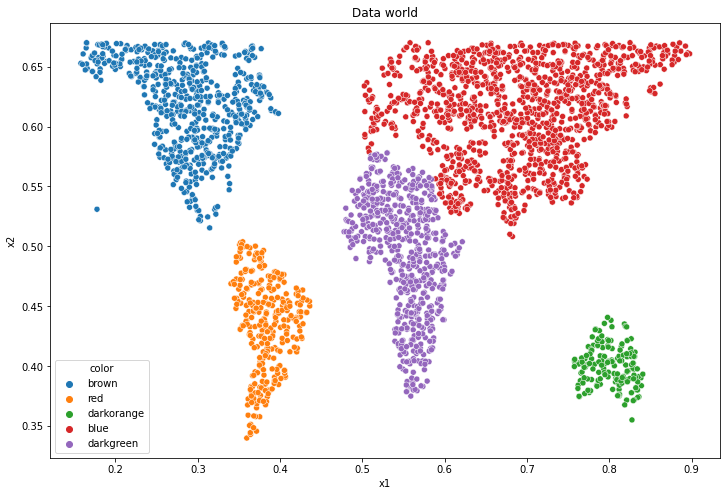

In [ ]:
fig, axs = plt.subplots( figsize=(12,8))
sns.scatterplot(data=data_world, x="x1", y="x2", hue="color")
plt.title("Data world")
plt.show()

### Embedding

In [ ]:
# transformamos los datos
y = np.array(data_world["color"])

p = np.array(data_world["x1"])*(2*np.pi-0.55)
t = np.array(data_world["x2"])*np.pi
x_sphere = np.sin(t)*np.cos(p)
y_sphere = np.sin(t)*np.sin(p)
z_sphere = np.cos(t)
X_sphere = np.array ([ x_sphere , y_sphere , z_sphere ]).T

scaler = StandardScaler(with_mean=True, with_std=True)
X_std = scaler.fit_transform(X_sphere)

print(X_sphere.shape)

(2906, 3)


NameError: ignored

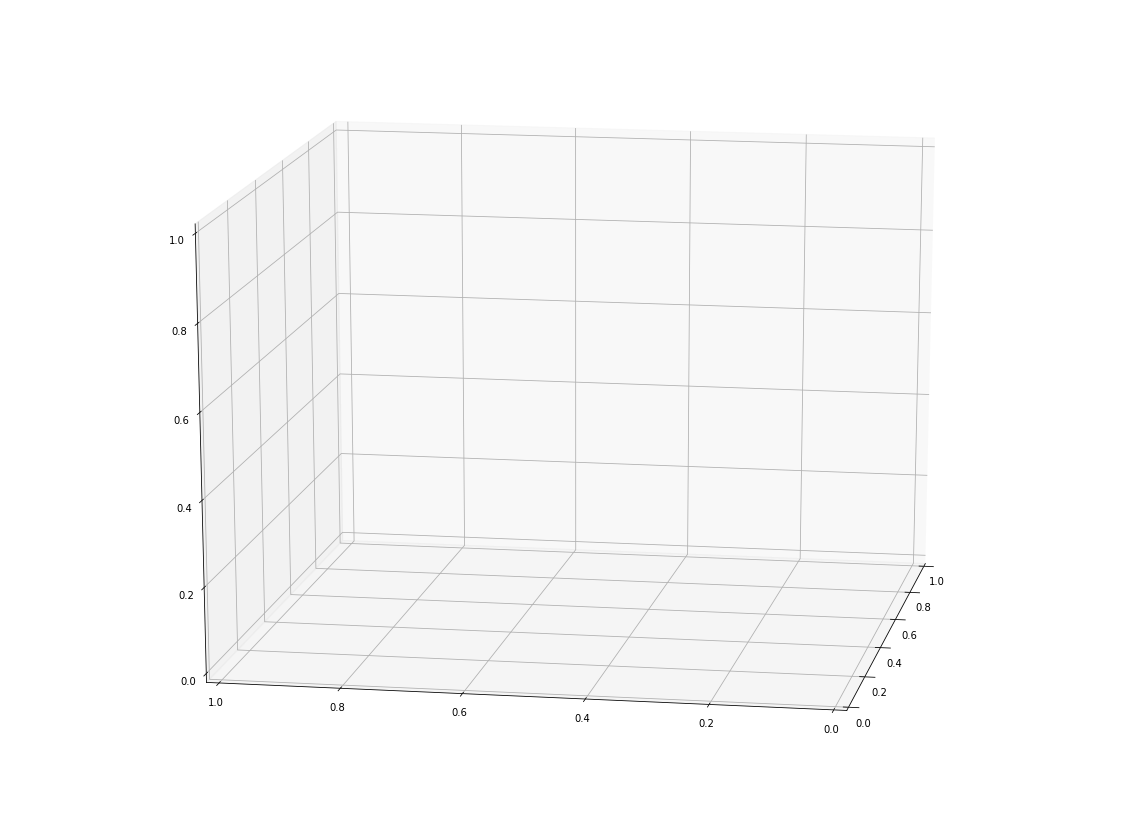

In [ ]:
# graficamos
plt.figure(figsize=(20 ,15))
ax = plt.axes(projection="3d")
ax.view_init(16, -170)
ax.scatter3D(X_sphere[:, 0], X_sphere[:, 1], -X_sphere [:, 2], 
               c=y)
plt.show ()

## PCA

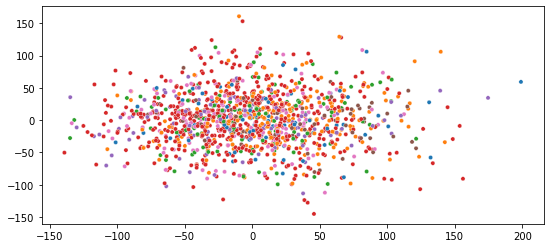

In [ ]:
pca = PCA(n_components=2) # Initialize with n_components parameter to only find the top eigenvectors
#z = pca.fit_transform(X)
z_pca = pca.fit_transform(X_std)

fig, axs = plt.subplots(figsize=(9, 4))
sns.scatterplot(x=z_pca[:,0], y=z_pca[:,1], legend=False, size=1, 
                hue=y, palette="tab10")

plt.show()

## Kernel PCA

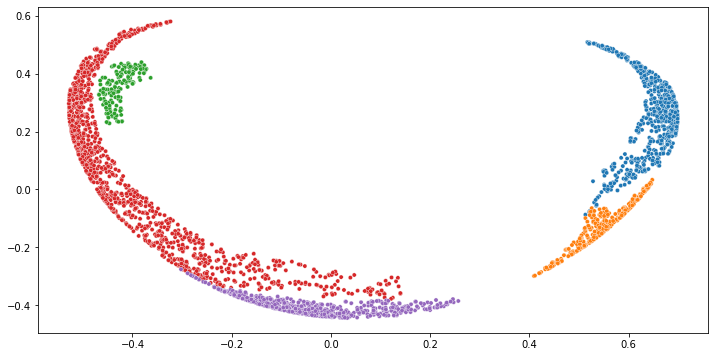

In [ ]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.4) # Initialize with n_components parameter to only find the top eigenvectors
#z = pca.fit_transform(X)
z_kpca = kpca.fit_transform(X_sphere)

fig, axs = plt.subplots(figsize=(12, 6))
sns.scatterplot(x=z_kpca[:,0], y=z_kpca[:,1], legend=False, size=0.7, 
                hue=y, palette="tab10")

plt.show()

## Spectral Embeddings

Kernel is  nearest_neighbors


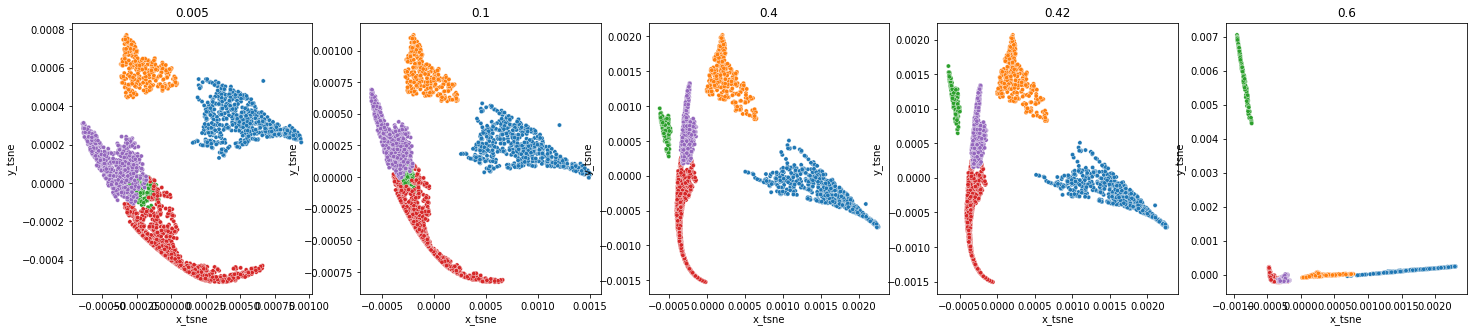

In [ ]:
knn = [4, 10, 15, 30] 
gamma = [0.005, 0.1, 0.4, 0.42, 0.6]
affinity = ["rbf", "nearest_neighbors"] 
eigen_solver = ["lobpcg", "arpack"]

fig, axs = plt.subplots(ncols=5, figsize=(25,5))
for i in [0, 1, 2, 3, 4]:
    embedding = SpectralEmbedding(n_components=2, affinity="rbf", gamma=gamma[i], eigen_solver=eigen_solver[1], 
                                    n_neighbors=3, n_jobs=-1, random_state=42)

    z_tsne = embedding.fit_transform(X_std)
    z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

    sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
    axs[i].set_title(gamma[i])
print("Kernel is ", aff)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklea

Kernel is  nearest_neighbors


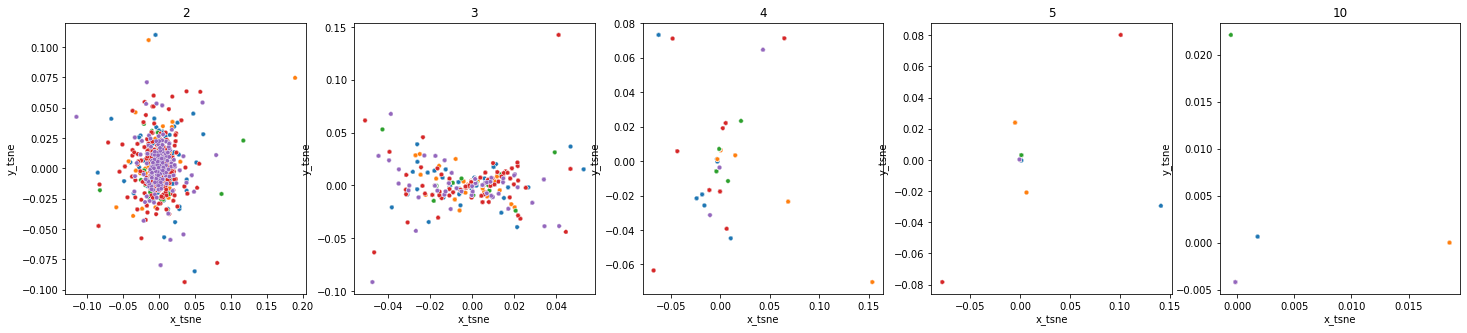

In [ ]:
knn = [2, 3, 4, 5, 10] 
gamma = [0.005, 0.1, 0.4, 0.6, 0.8]
affinity = ["nearest_neighbors"] 
eigen_solver = ["lobpcg", "arpack"]

fig, axs = plt.subplots(ncols=5, figsize=(25,5))
for i in [0, 1, 2, 3, 4]:
    embedding = SpectralEmbedding(n_components=5, affinity="nearest_neighbors", eigen_solver="arpack", 
                                    n_neighbors=knn[i], n_jobs=-1, random_state=42)

    z_tsne = embedding.fit_transform(X_std)
    z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

    sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
    axs[i].set_title(knn[i])
print("Kernel is ", aff)
plt.show()

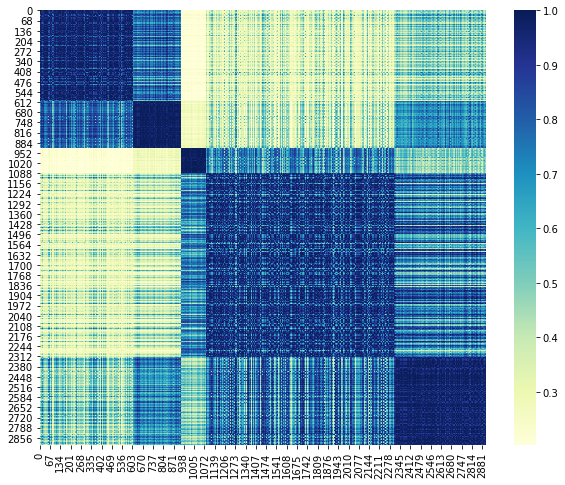

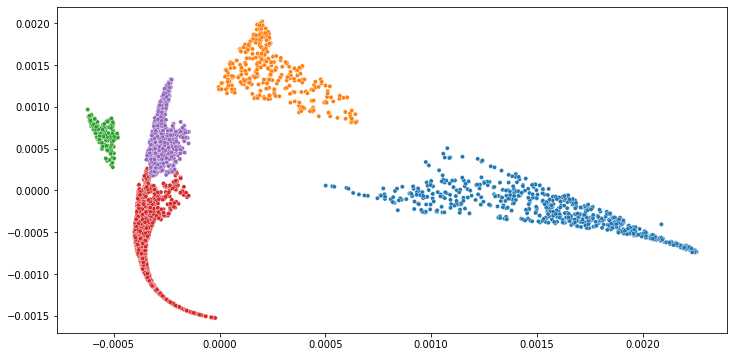

In [ ]:
knn = 10 # k-vecinos cercanos para la construcción del grafo
sigma = 0.4
aff = "rbf"
embedding = SpectralEmbedding(n_components=2, affinity=aff, gamma=sigma,
                              eigen_solver='arpack', n_neighbors=knn, random_state=19970808)

embedding.fit(X_sphere)

plt.figure(figsize=(10,8))
if aff == 'nearest_neighbors':
  w = embedding.affinity_matrix_.toarray()
else:
  w = embedding.affinity_matrix_

sns.heatmap(w, cmap="YlGnBu")

z_embedding = embedding.fit_transform(X_std)
fig, axs = plt.subplots(figsize=(12, 6))
sns.scatterplot(x=z_embedding[:,0], y=z_embedding[:,1], legend=False, size=0.7, 
                hue=y, palette="tab10")

plt.show()

## T-SNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, random_state=42)
z_tsne = tsne.fit_transform(X_sphere)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.002s...
[t-SNE] Computed neighbors for 2906 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.051773
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.669384
[t-SNE] KL divergence after 1000 iterations: 0.405060


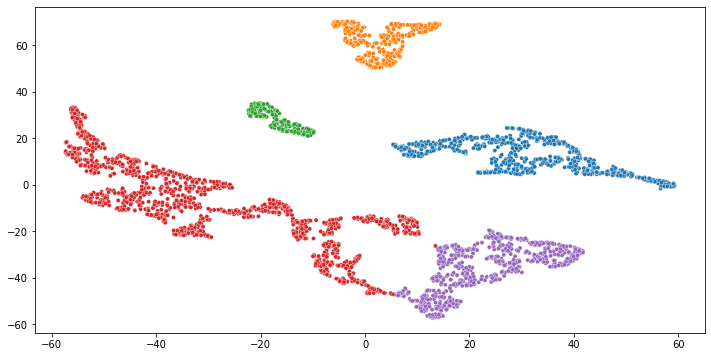

In [ ]:
fig, axs = plt.subplots(figsize=(12, 6))
sns.scatterplot(x=z_tsne[:,0], y=z_tsne[:,1], legend=False, size=0.7, 
                hue=y, palette="tab10")

plt.show()

In [ ]:
#### Hyperparametros

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.002s...
[t-SNE] Computed neighbors for 2906 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.015396
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.962387
[t-SNE] KL divergence after 1000 iterations: 0.604711
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.002s...
[t-SNE] Computed neighbors for 2906 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.035022
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.315952
[t-SNE] KL divergence after 1000 iterations: 0.487066


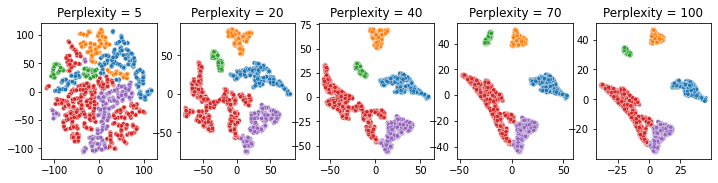

In [ ]:
perplexity = [5, 20, 40, 70, 100]
fig, axs = plt.subplots(ncols=5, figsize=(12,2.5))
h = 0
for i in perplexity:
    tsne = TSNE(n_components=2, verbose=1, perplexity=i, random_state=42)
    z_tsne = tsne.fit_transform(X_sphere)
    sns.scatterplot(ax=axs[h], x=z_tsne[:,0], y=z_tsne[:,1], legend=False,
                       size=0.7, hue=y, palette="tab10")
    axs[h].set(title="Perplexity = "+str(i))
    h += 1
plt.show()

## Modelos finales

--------------------Finished PCA-----------------
-------------------Finished KPCA-----------------
-------------------Finished Spectral Embedding-----------------
-------------------Finished T-SNE-----------------
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.002s...
[t-SNE] Computed neighbors for 2906 samples in 0.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.139087
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.304985
[t-SNE] KL divergence after 1000 iterations: 0.418625


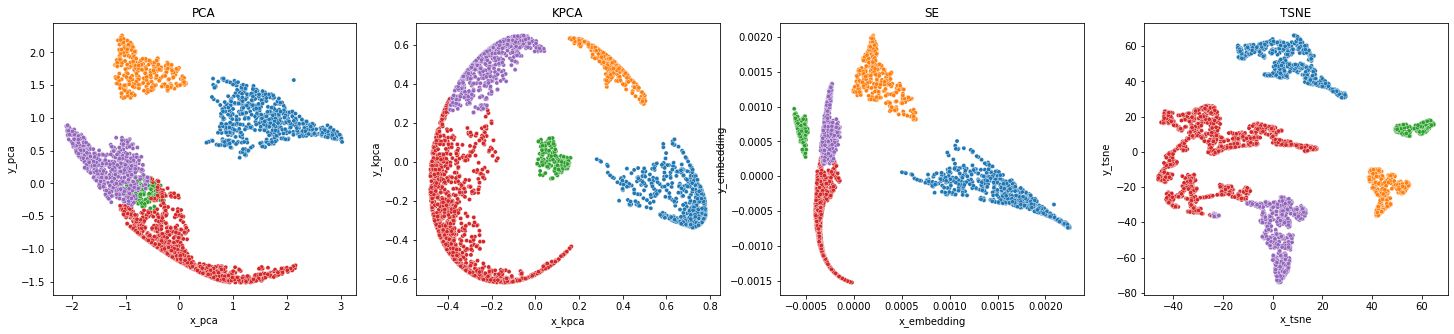

In [ ]:
# first models
kpca_kernel = 'rbf' 
kpca_gamma = 0.2
e_n_neighbors = 10 
e_gamma = 0.4
e_affinity = "rbf"
e_eigen='arpack'
t_perplexity = 40 
n_components = 2
t_verbose = 1
random_state = 19970808 

first_model = reduction_manifold(X_std, y, kpca_kernel, kpca_gamma, e_affinity, e_gamma, e_eigen, e_n_neighbors, t_perplexity)

--------------------Finished PCA-----------------
-------------------Finished KPCA-----------------
-------------------Finished Spectral Embedding-----------------
-------------------Finished T-SNE-----------------
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2906 samples in 0.002s...
[t-SNE] Computed neighbors for 2906 samples in 0.108s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2906
[t-SNE] Computed conditional probabilities for sample 2000 / 2906
[t-SNE] Computed conditional probabilities for sample 2906 / 2906
[t-SNE] Mean sigma: 0.139087
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.341644
[t-SNE] KL divergence after 1000 iterations: 0.406433


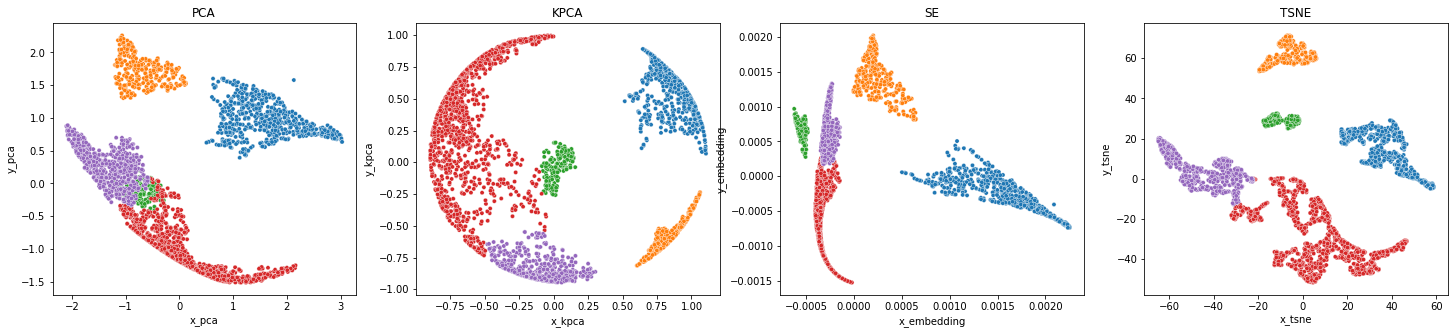

In [ ]:
kpca_kernel = 'cosine' 
first_model = reduction_manifold(X_std, y, kpca_kernel, kpca_gamma, e_affinity, e_gamma, e_eigen, e_n_neighbors, t_perplexity)

## MDS

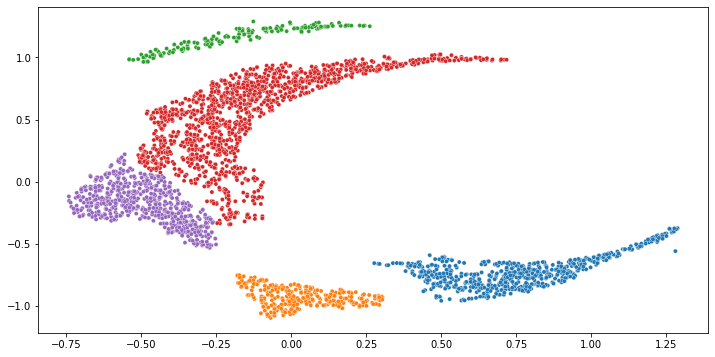

In [ ]:
mds = MDS(n_components=2, random_state=42, n_jobs=-1)
mds.fit(X_sphere)

fig, axs = plt.subplots(figsize=(12, 6))
sns.scatterplot(x=mds.embedding_[:,0], y=mds.embedding_[:,1], legend=False, size=0.7, 
                hue=y, palette="tab10")

plt.show()

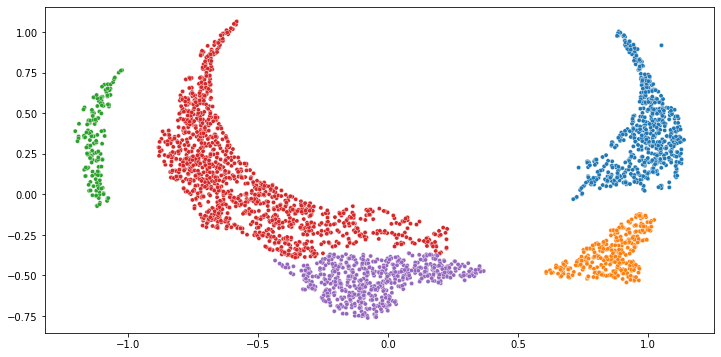

In [ ]:
mds = MDS(n_components=2, random_state=42, n_jobs=-1,  n_init=7)
mds.fit(X_sphere)

fig, axs = plt.subplots(figsize=(12, 6))
sns.scatterplot(x=mds.embedding_[:,0], y=mds.embedding_[:,1], legend=False, size=0.7, 
                hue=y, palette="tab10")

plt.show()

# Eigenfaces 

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=1)

In [ ]:
print("El dataset in # images", str(len(lfw_people.images)))

for name in lfw_people.target_names:
    print (name)

El dataset in # images 1288
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


In [ ]:
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
X_std = lfw_people.data
scaler = StandardScaler(with_mean=True, with_std=True)
X_std = scaler.fit_transform(X_std)

y = lfw_people.target
target_names = lfw_people.target_names

In [ ]:
X.shape

(1288, 11750)

--------------------Finished PCA-----------------
-------------------Finished KPCA-----------------
-------------------Finished Spectral Embedding-----------------
-------------------Finished T-SNE-----------------
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1288 samples in 0.388s...
[t-SNE] Computed neighbors for 1288 samples in 7.228s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1288
[t-SNE] Computed conditional probabilities for sample 1288 / 1288
[t-SNE] Mean sigma: 15.051657
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.143051
[t-SNE] KL divergence after 1000 iterations: 1.564769


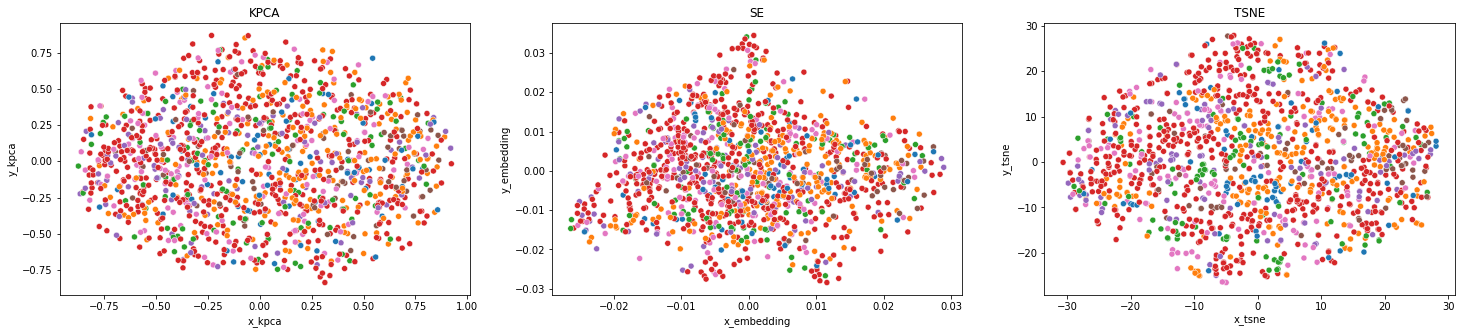

In [ ]:
# first models
kpca_kernel = 'cosine' 
kpca_gamma = 0.4
e_n_neighbors = 7
e_gamma = 0.4
e_affinity = "nearest_neighbors"
e_eigen='arpack'
t_perplexity = 40 
y = lfw_people.target
n_components = 2
t_verbose = 1
random_state = 19970808 

first_model = reduction_manifold(X_std, y, kpca_kernel, kpca_gamma, e_affinity, e_gamma, e_eigen, e_n_neighbors, t_perplexity)

# Tuning Hyperparameters

### TSNE

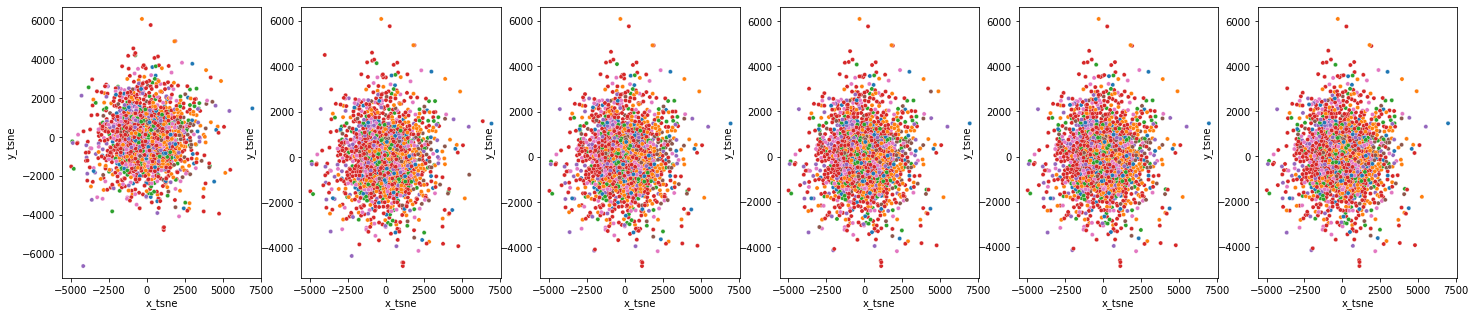

In [ ]:
perplexity = [5, 10, 20, 40, 60, 80]
verbose = [1]
fig, axs = plt.subplots(ncols=6, figsize=(25,5))
for i in [0, 1, 2, 3, 4, 5]:
  tsne = TSNE(n_components=2, perplexity=perplexity[i], random_state=19970808,
                  init="pca", n_jobs=-1)
  z_tsne = tsne.fit_transform(X)
  z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

  sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
plt.show()


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1288 samples in 1.461s...
[t-SNE] Computed neighbors for 1288 samples in 27.966s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1288
[t-SNE] Computed conditional probabilities for sample 1288 / 1288
[t-SNE] Mean sigma: 20.003245
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.759140
[t-SNE] KL divergence after 1000 iterations: 1.834219
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1288 samples in 1.526s...
[t-SNE] Computed neighbors for 1288 samples in 27.966s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1288
[t-SNE] Computed conditional probabilities for sample 1288 / 1288
[t-SNE] Mean sigma: 23.374335
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.767326
[t-SNE] KL divergence after 1000 iterations: 1.888042
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1288 samples in 1.529s...
[t-SNE] Computed neighbors for 1288 samples 

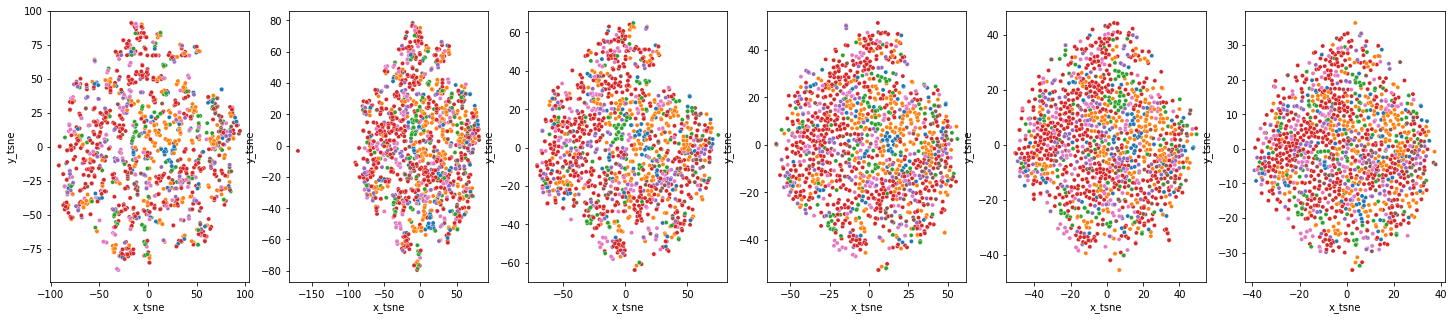

In [ ]:
perplexity = [5, 10, 20, 40, 60, 80]
verbose = [1]
fig, axs = plt.subplots(ncols=6, figsize=(25,5))
for i in [0, 1, 2, 3, 4, 5]:
  tsne = TSNE(n_components=2, perplexity=perplexity[i], random_state=19970808,
                  init="pca", n_jobs=-1, verbose=1)
  z_tsne = tsne.fit_transform(X_std)
  z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

  sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
plt.show()


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1288 samples in 1.449s...
[t-SNE] Computed neighbors for 1288 samples in 28.082s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1288
[t-SNE] Computed conditional probabilities for sample 1288 / 1288
[t-SNE] Mean sigma: 20.003245
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.065002
[t-SNE] KL divergence after 1000 iterations: 1.916491
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1288 samples in 1.549s...
[t-SNE] Computed neighbors for 1288 samples in 28.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1288
[t-SNE] Computed conditional probabilities for sample 1288 / 1288
[t-SNE] Mean sigma: 23.374335
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.697144
[t-SNE] KL divergence after 1000 iterations: 1.946351
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1288 samples in 1.531s...
[t-SNE] Computed neighbors for 1288 samples 

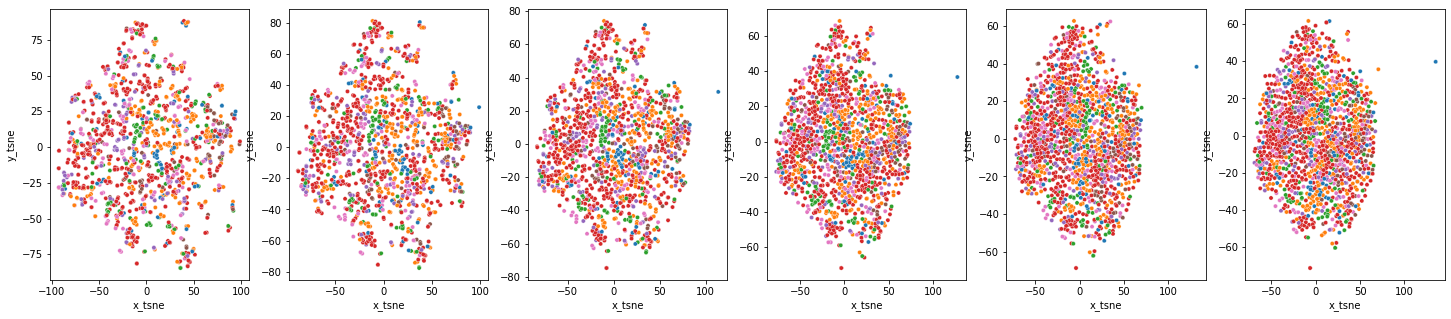

In [ ]:
perplexity = [5, 10, 20, 40, 60, 80]
verbose = [1]
fig, axs = plt.subplots(ncols=6, figsize=(25,5))
for i in [0, 1, 2, 3, 4, 5]:
  tsne = TSNE(n_components=2, perplexity=perplexity[i], random_state=19970808,
                  init="pca", n_jobs=-1, verbose=1, learning_rate=10)
  z_tsne = tsne.fit_transform(X_std)
  z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

  sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
plt.show()

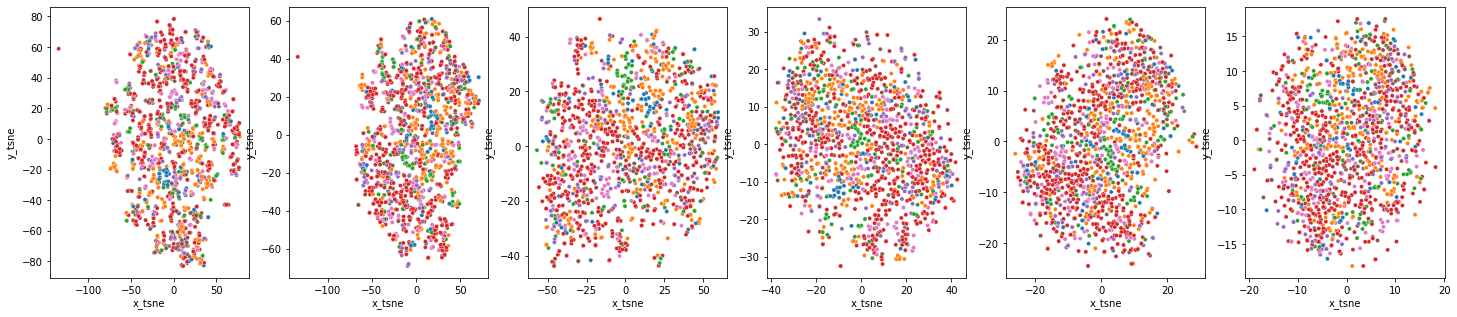

In [ ]:
perplexity = [5, 10, 20, 40, 60, 80]
verbose = [1]
fig, axs = plt.subplots(ncols=6, figsize=(25,5))
for i in [0, 1, 2, 3, 4, 5]:
  tsne = TSNE(n_components=2, perplexity=perplexity[i], random_state=19970808,
                  init="random", n_jobs=-1)
  z_tsne = tsne.fit_transform(X_std)
  z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

  sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
plt.show()

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1288 samples in 1.451s...
[t-SNE] Computed neighbors for 1288 samples in 28.175s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1288
[t-SNE] Computed conditional probabilities for sample 1288 / 1288
[t-SNE] Mean sigma: 20.003245
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.502335
[t-SNE] KL divergence after 1000 iterations: 1.783981
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1288 samples in 1.533s...
[t-SNE] Computed neighbors for 1288 samples in 28.067s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1288
[t-SNE] Computed conditional probabilities for sample 1288 / 1288
[t-SNE] Mean sigma: 23.374335
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.802277
[t-SNE] KL divergence after 1000 iterations: 1.822397
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 1288 samples in 1.528s...
[t-SNE] Computed neighbors for 1288 samples 

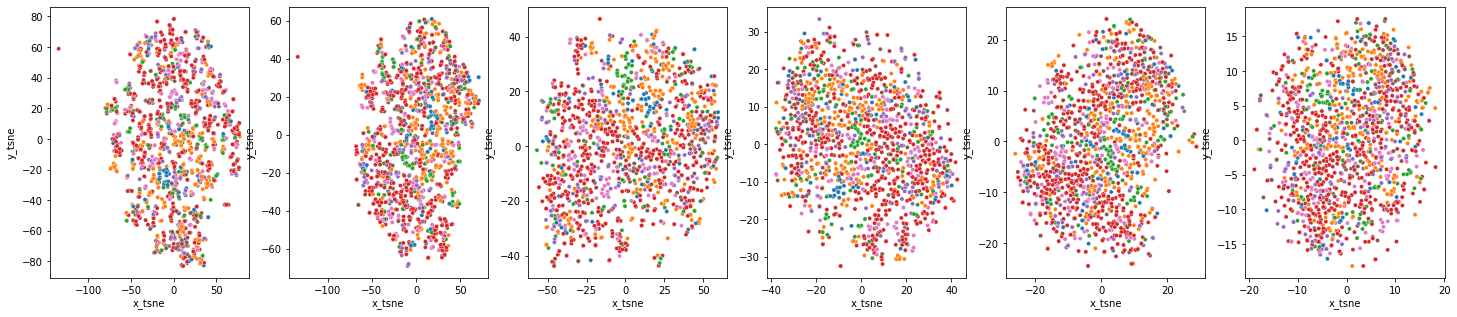

In [ ]:
perplexity = [5, 10, 20, 40, 60, 80]
verbose = [1]
fig, axs = plt.subplots(ncols=6, figsize=(25,5))
for i in [0, 1, 2, 3, 4, 5]:
  tsne = TSNE(n_components=2, perplexity=perplexity[i], random_state=19970808,
                  init="random", n_jobs=-1, verbose=1)
  z_tsne = tsne.fit_transform(X_std)
  z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

  sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
plt.show()

## KPCA

Kernel is  rbf


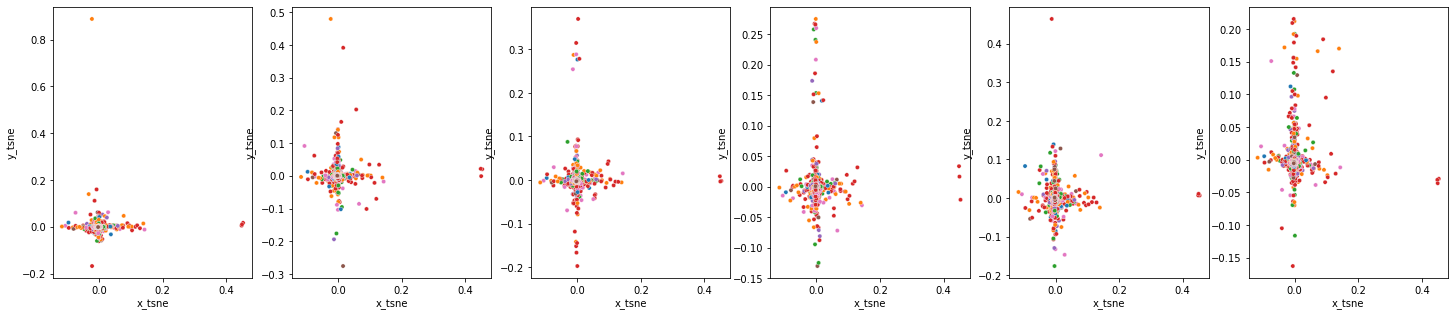

Kernel is  sigmoid


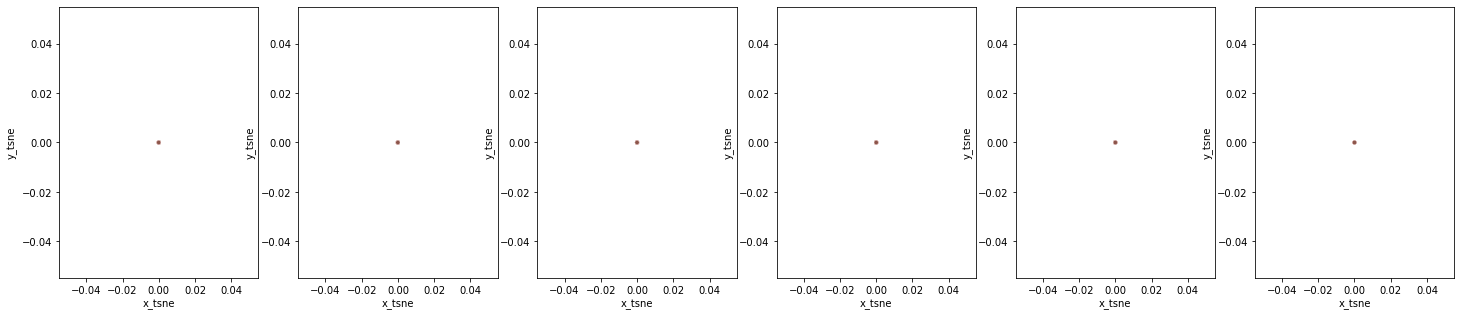

Kernel is  poly


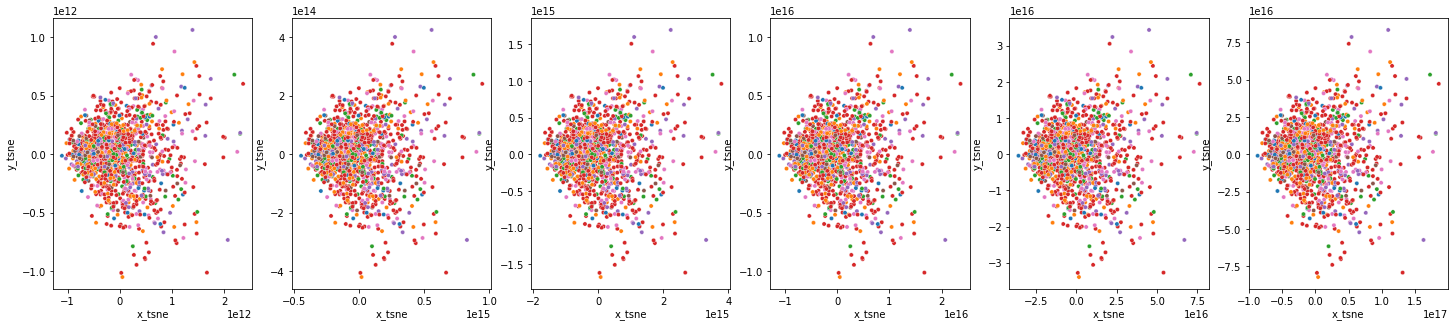

Kernel is  linear


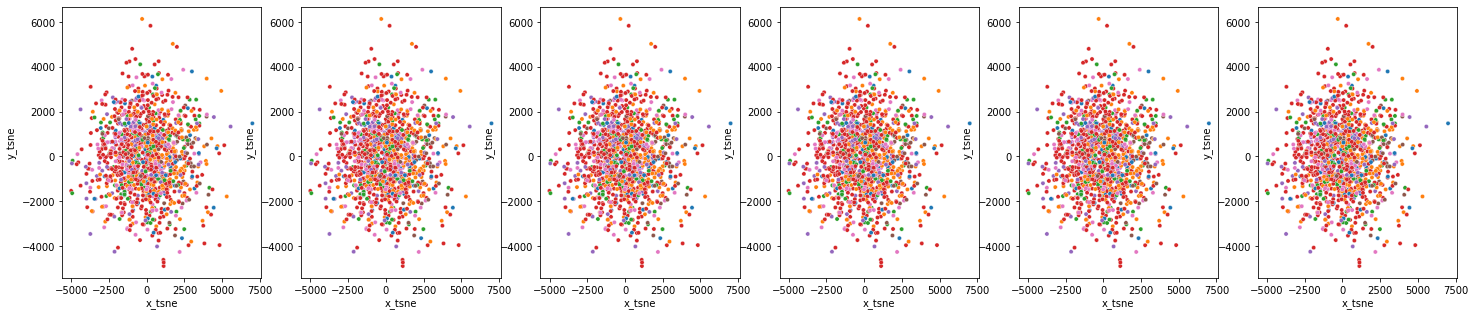

Kernel is  cosine


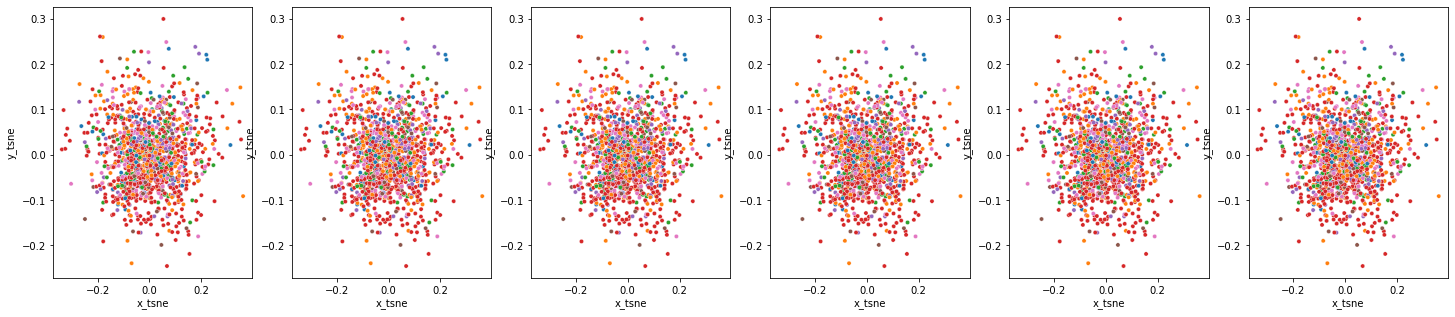

In [ ]:
kernel = ['rbf', "sigmoid", "poly", "linear", "cosine"]
gamma = [0.005, 0.1, 0.2, 0.5, 0.9, 1.4]
eigen_solver = ["auto", "dense", "arpack"]

for j in kernel:
    fig, axs = plt.subplots(ncols=6, figsize=(25,5))
    for i in [0, 1, 2, 3, 4, 5]:
      kpca = KernelPCA(n_components=2, kernel=j, gamma=gamma[i], random_state=42, degree=4, alpha=.4)

      z_tsne = kpca.fit_transform(X)
      z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

      sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
    print("Kernel is ", str(j))
    plt.show()

Kernel is  rbf


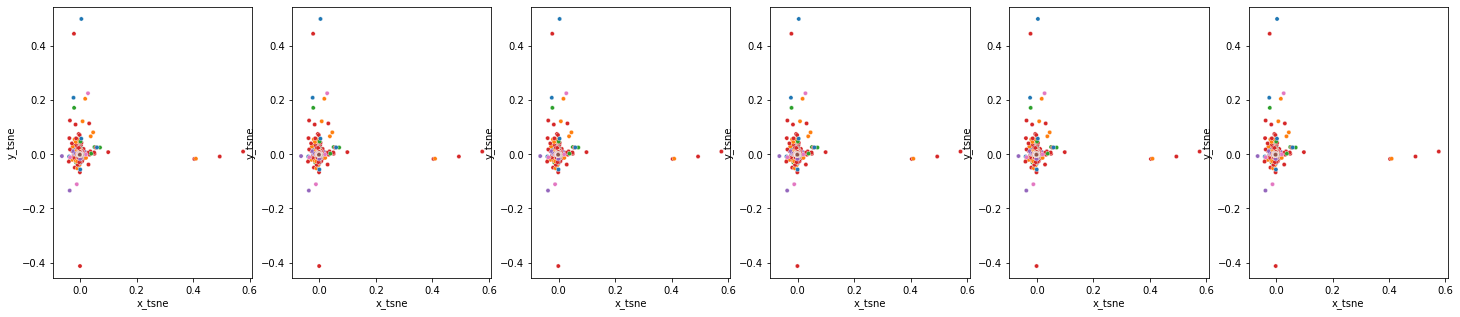

Kernel is  sigmoid


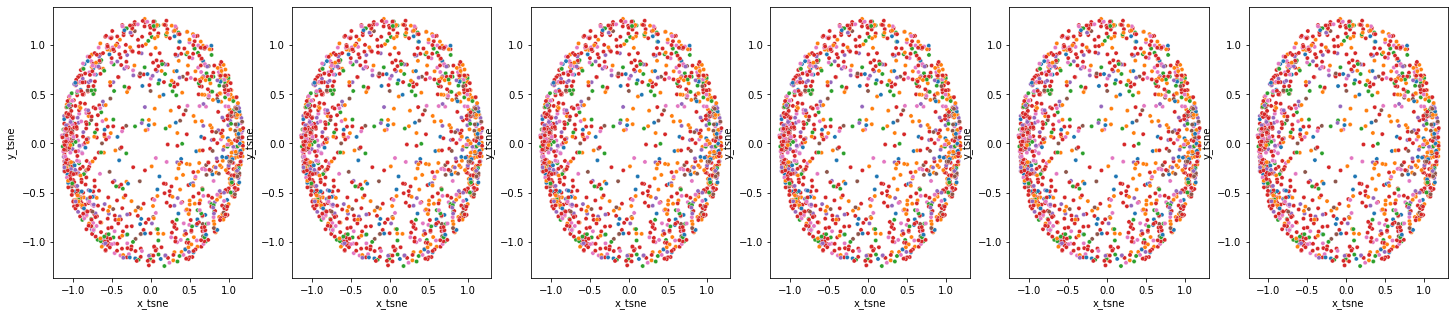

Kernel is  poly


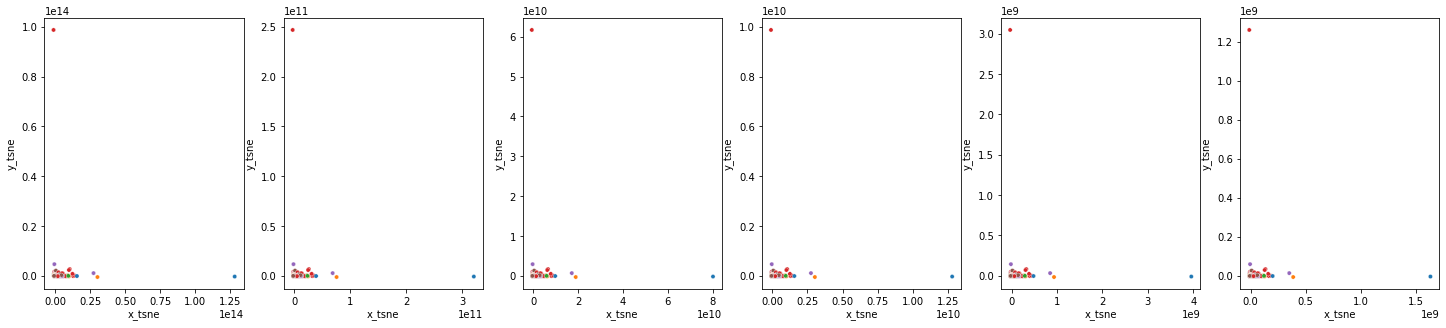

Kernel is  linear


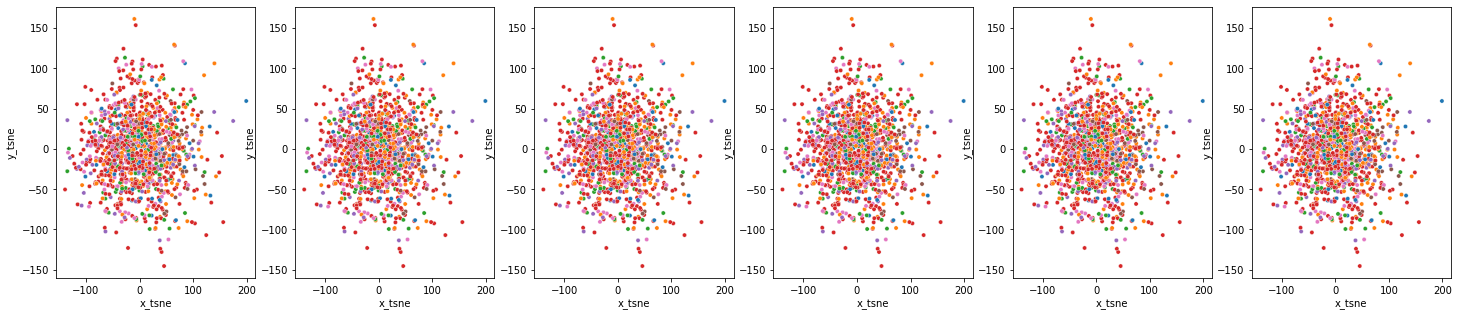

Kernel is  cosine


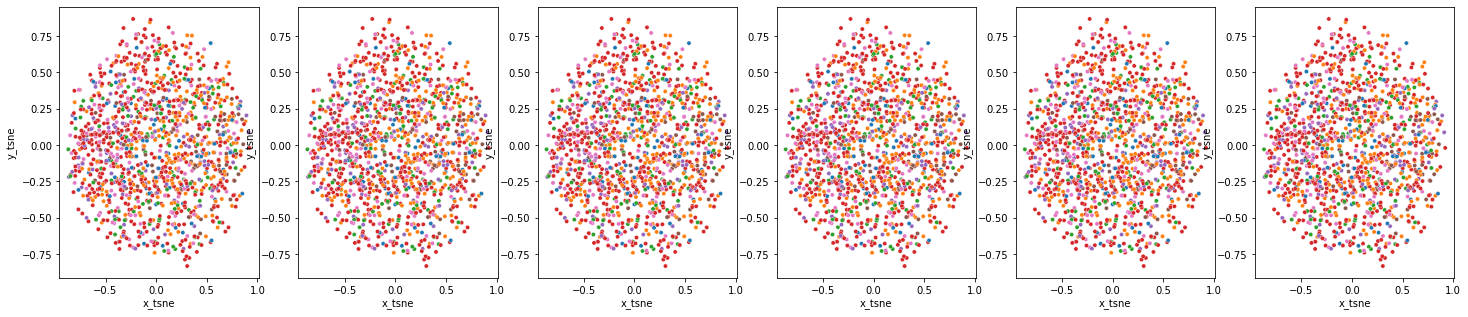

In [ ]:
kernel = ['rbf', "sigmoid", "poly", "linear", "cosine"]
gamma = [0.005, 0.1, 0.2, 0.5, 0.9, 1.4]
eigen_solver = ["auto", "dense", "arpack"]

for j in kernel:
    fig, axs = plt.subplots(ncols=6, figsize=(25,5))
    for i in [0, 1, 2, 3, 4, 5]:
      kpca = KernelPCA(n_components=2, kernel=j, gamma=1/gamma[i], random_state=19970808, degree=4, alpha=.6)

      z_tsne = kpca.fit_transform(X_std)
      z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

      sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
    print("Kernel is ", str(j))
    plt.show()

## Spectral Embeddings

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklea

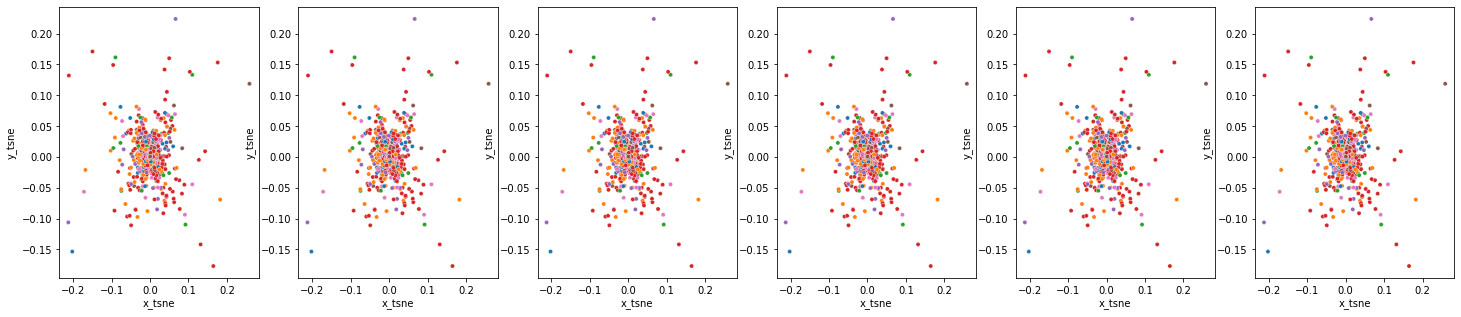

In [ ]:
knn = [4, 10, 15, 30] 
gamma = [0.005, 0.1, 0.2, 0.5, 0.9, 1.4]
affinity = "rbf" 
eigen_solver = ["lobpcg", "arpack"]

fig, axs = plt.subplots(ncols=6, figsize=(25,5))
for i in [0, 1, 2, 3, 4, 5]:
  embedding = SpectralEmbedding(n_components=2, affinity=affinity, gamma=gamma[i], n_jobs=-1, random_state=19970808)
  z_tsne = embedding.fit_transform(X)
  z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})
            
  sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


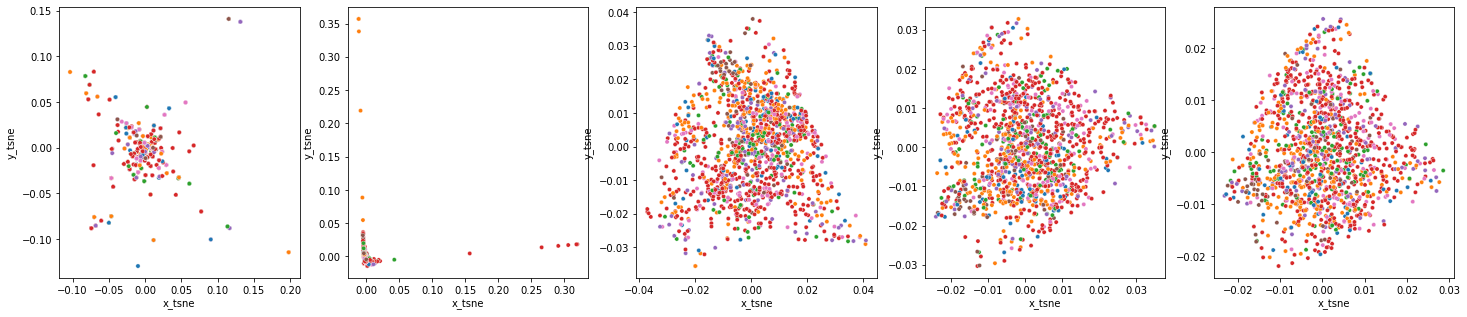

In [ ]:
knn = [2, 3, 5, 7, 10] 
affinity = "nearest_neighbors" 
eigen_solver = ["lobpcg", "arpack"]
fig, axs = plt.subplots(ncols=5, figsize=(25,5))
for i in [0, 1, 2, 3, 4]:
  embedding = SpectralEmbedding(n_components=2, affinity=affinity, n_neighbors=knn[i], n_jobs=-1, random_state=19970808)
  z_tsne = embedding.fit_transform(X)
  z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})
            
  sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/sklea

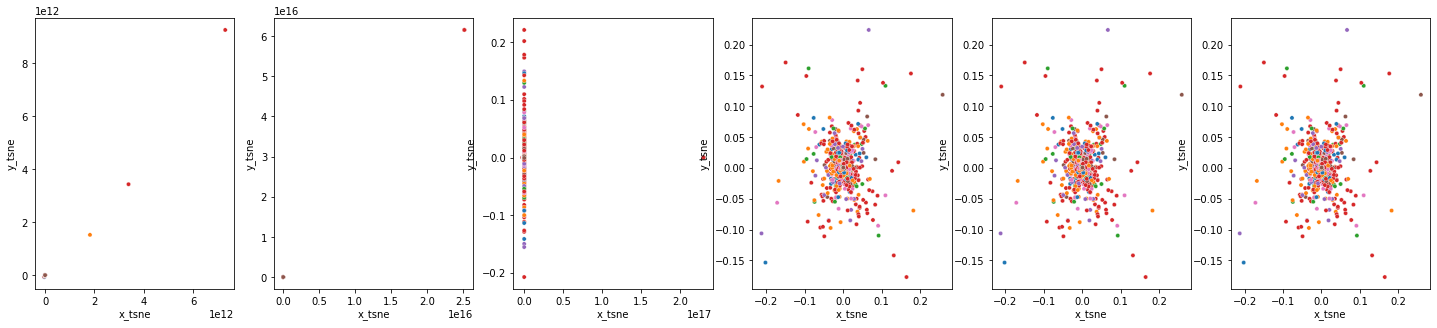

In [ ]:
knn = [4, 10, 15, 30] 
gamma = [0.005, 0.1, 0.2, 0.5, 0.9, 1.4]
affinity = "rbf" 
eigen_solver = ["lobpcg", "arpack"]

fig, axs = plt.subplots(ncols=6, figsize=(25,5))
for i in [0, 1, 2, 3, 4, 5]:
  embedding = SpectralEmbedding(n_components=2, affinity=affinity, gamma=gamma[i], n_jobs=-1, random_state=19970808)
  z_tsne = embedding.fit_transform(X_std)
  z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})
            
  sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


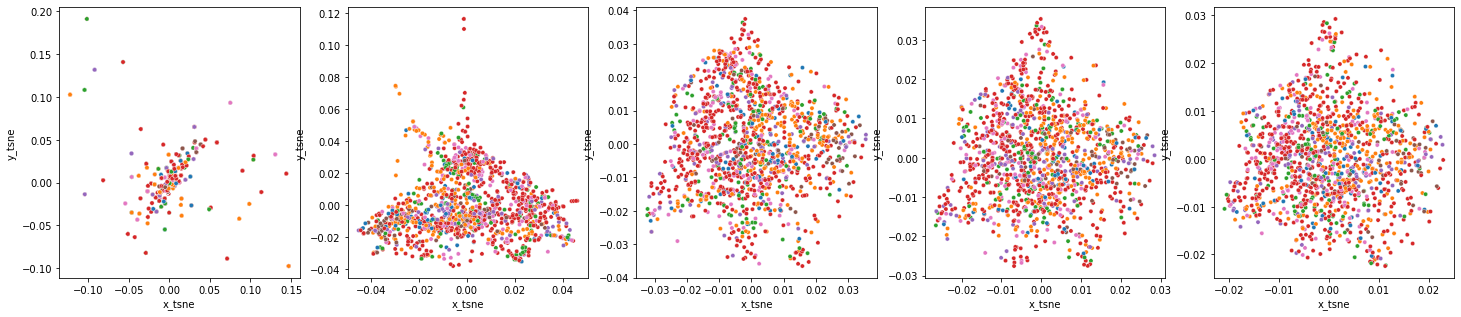

In [ ]:
knn = [2, 3, 5, 7, 10] 
affinity = "nearest_neighbors" 
eigen_solver = ["lobpcg", "arpack"]
fig, axs = plt.subplots(ncols=5, figsize=(25,5))
for i in [0, 1, 2, 3, 4]:
  embedding = SpectralEmbedding(n_components=2, affinity=affinity, n_neighbors=knn[i], n_jobs=-1, random_state=19970808)
  z_tsne = embedding.fit_transform(X_std)
  z_tsne = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})
            
  sns.scatterplot(ax=axs[i], x=z_tsne.iloc[:,0], y=z_tsne.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")
plt.show()

## Analisis de resultados

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1288 samples in 1.719s...
[t-SNE] Computed neighbors for 1288 samples in 28.693s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1288
[t-SNE] Computed conditional probabilities for sample 1288 / 1288
[t-SNE] Mean sigma: 28.574248
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.271683
[t-SNE] KL divergence after 1000 iterations: 1.630716


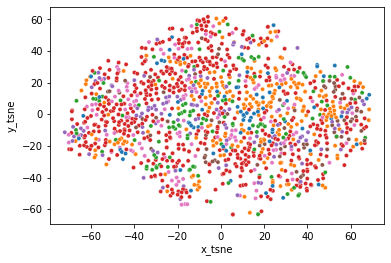

In [ ]:
tsne = TSNE(n_components=2, perplexity=40, random_state=19970808,
                  init="pca", n_jobs=-1, verbose=1, learning_rate=15)
z_tsne = tsne.fit_transform(X_std)
z_tsne_new = pd.DataFrame({"x_tsne":z_tsne[:,0], "y_tsne":z_tsne[:,1]})

sns.scatterplot(x=z_tsne_new.iloc[:,0], y=z_tsne_new.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")

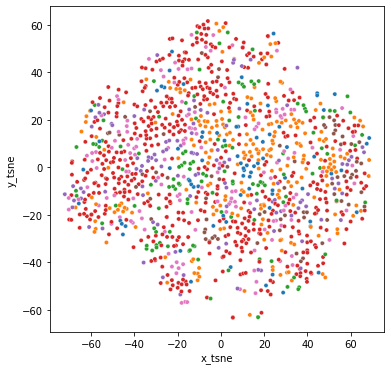

In [ ]:
fig, axs = plt.subplots(figsize=(6,6))
sns.scatterplot(x=z_tsne_new.iloc[:,0], y=z_tsne_new.iloc[:,1], legend=False, size=0.7, 
                      hue=y, palette="tab10")

In [ ]:
for i in range(X.shape[0]):
  plt.imsave('drive/MyDrive/Colab Notebooks/data/'+str(i+1)+'.png', np.reshape(X[i,:],(125,94)),cmap='gray')

dir_tr = 'data/'
sorted_files = sorted_alphanumeric(os.listdir(dir_tr))
name_imgs_tr = [os.path.join(dir_tr,f) for f in sorted_files]
names_imgs_tr = [ "data/"+i[8:] for i in name_imgs_tr]

In [ ]:
names_imag= target_names[y]

In [ ]:
['sujeto: '++ for i in range(1,z_tsne.shape[0]+1)]

In [ ]:
color_df= pd.DataFrame(target_names[y],columns=["names"])
color_df["color"] = color_df.names.replace({'George W Bush':'blue', 
                                             'Tony Blair':'green',
                                             'Gerhard Schroeder':'black',
                                             'Colin Powell':'violet',
                                             'Donald Rumsfeld': 'red', 
                                             'Ariel Sharon': 'orange',
                                             'Hugo Chavez': 'brown'})

alpha_df= pd.DataFrame(target_names[y],columns=["names"])
alpha_df["alpha"] = color_df.names.replace({'George W Bush':.15, 
                                             'Tony Blair':.15,
                                             'Gerhard Schroeder':.15,
                                             'Colin Powell':.15,
                                             'Donald Rumsfeld':.15, 
                                             'Ariel Sharon': .15,
                                             'Hugo Chavez':.15})

# diccionario con los datos para la grafica de Bokeh
pc_source = dict(x=z_tsne[:,0], y=z_tsne[:,1], label=y, color=color_df.color.to_list(), 
                 desc=['sujeto: '+names_imag[i-1] for i in range(1,z_tsne.shape[0]+1)], imgs=names_imgs_tr)

In [ ]:
output_file("eigenfaces_tsne.html")

source = ColumnDataSource(data = pc_source)

hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="100" alt="@imgs" width="100"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
            <div>
                <span style="font-size: 17px; font-weight: bold;">@desc</span>
                <span style="font-size: 15px; color: #966;">[$index]</span>
            </div>
            <div>
                <span style="font-size: 15px;">Location</span>
                <span style="font-size: 10px; color: #696;">($x, $y)</span>
            </div>
        </div>
        """
    )

p = figure(plot_width=1000, plot_height=800, tools=[hover], title="Eigenfaces_train")

p.circle('x', 'y', size=7,  color='color', source=source)

show(p)